<a href="https://colab.research.google.com/github/aakashv000/Machine-Learning-Lab-CS3103/blob/master/Lab_10_Ensembling_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generating dataset

In [0]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

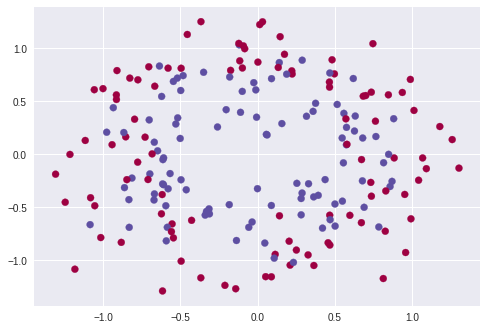

In [3]:
X, y = make_circles(n_samples=200, noise=0.2, factor=0.7)

X.shape, set(y), np.count_nonzero(y)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

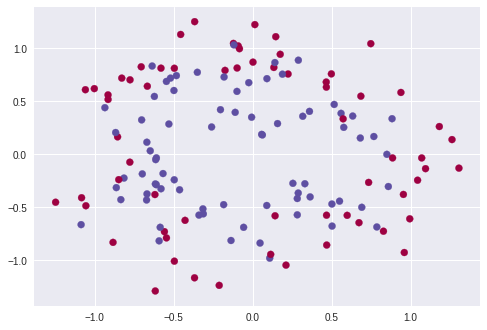

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)

## Q1:

### Build classifiers

In [0]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [0]:
svm = SVC()
dt = DecisionTreeClassifier(max_depth=10)
lr = LogisticRegression()

In [7]:
svm.fit(X, y)
dt.fit(X, y)
lr.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
voting_clf = VotingClassifier(estimators=[('svm', svm),
                                          ('dt', dt),
                                          ('lr', lr)],
                              voting='hard')

In [9]:
voting_clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)), ('dt', DecisionTreeClassifier(class_weight...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

### Get accuracy score

In [0]:
from sklearn.metrics import accuracy_score

In [11]:
for clf in [svm, dt, lr, voting_clf]:
    y_pred = clf.predict(X_test)
    
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.7333333333333333
DecisionTreeClassifier 0.9666666666666667
LogisticRegression 0.4166666666666667
VotingClassifier 0.8


### Plotting Decision Boundaries

In [0]:
# from matplotlib.colors import ListedColormap

In [0]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

cm = ListedColormap(['#FF0000', '#0000FF'])

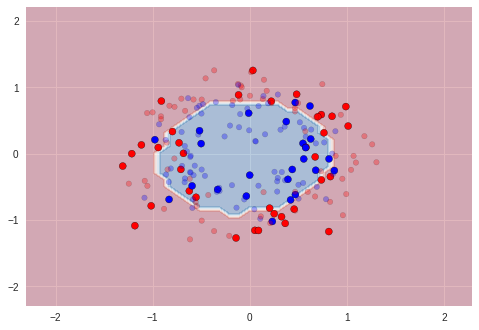

In [44]:
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm, edgecolors='k')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm, edgecolors='k', s=30, alpha=0.3)

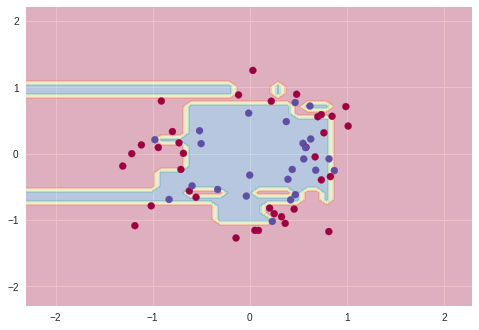

In [17]:
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Spectral)

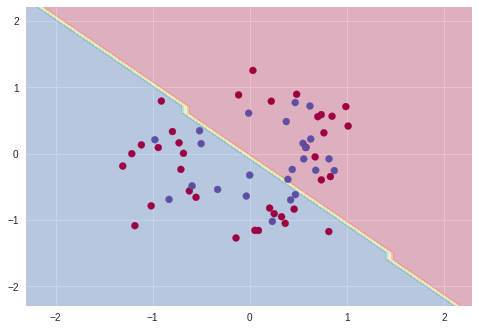

In [18]:
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Spectral)

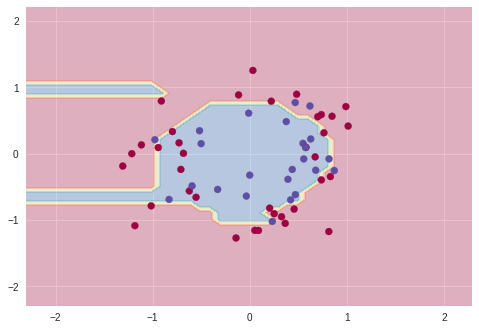

In [19]:
Z = voting_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Spectral)

### Validation Curve

In [0]:
from sklearn.model_selection import cross_val_score

In [21]:
#TODO: Verify cv_scores

cv_scores = []
for depth in range(1, 11):
    voting_clf.named_estimators_.dt.max_depth = depth
    
    cv_score = np.average(cross_val_score(voting_clf, X, y, cv=3))
    cv_scores.append(cv_score)

cv_scores

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[0.7205882352941178,
 0.7254901960784315,
 0.7205882352941178,
 0.7305407011289363,
 0.7204396910279263,
 0.7205882352941178,
 0.7153891859774214,
 0.7305407011289363,
 0.7204396910279263,
 0.7205882352941178]

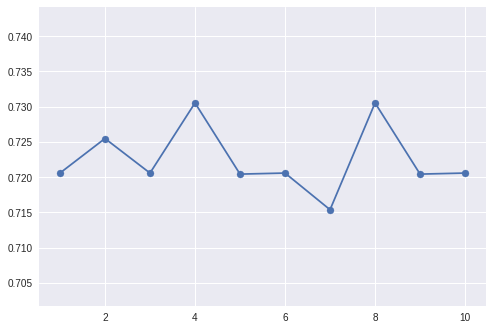

In [22]:
plt.scatter(range(1, 11), cv_scores)
plt.plot(range(1, 11), cv_scores)